In [1]:
import numpy as np
from matplotlib.patches import FancyArrowPatch
from matplotlib import pyplot as plt

def draw_angle_arc(
    ax,
    start_vec,
    end_vec,
    label,
    origin=np.array([0.0, 0.0]),
    radius=0.4,
    n_points=100,
    color='gray',
    label_offset=0.05,
    arrow_kwargs=None
):
    if arrow_kwargs is None:
        arrow_kwargs = dict(arrowstyle='->', mutation_scale=10, lw=1)

    # Normalize input vectors
    start = start_vec / np.linalg.norm(start_vec)
    end = end_vec / np.linalg.norm(end_vec)

    # Angles of the vectors
    theta_start = np.arctan2(start[1], start[0])
    theta_end = np.arctan2(end[1], end[0])

    # Compute the shortest signed angle difference
    delta = np.arctan2(np.sin(theta_end - theta_start), np.cos(theta_end - theta_start))
    theta_end_wrapped = theta_start + delta

    # Create arc
    arc_theta = np.linspace(theta_start, theta_end_wrapped, n_points)
    arc_x = origin[0] + radius * np.cos(arc_theta)
    arc_y = origin[1] + radius * np.sin(arc_theta)
    ax.plot(arc_x, arc_y, color=color)

    # Arrowhead
    arrow = FancyArrowPatch(
        (arc_x[-2], arc_y[-2]),
        (arc_x[-1], arc_y[-1]),
        color=color,
        **arrow_kwargs
    )
    ax.add_patch(arrow)

    # Label at midpoint
    theta_mid = 0.5 * (theta_start + theta_end_wrapped)
    label_x = origin[0] + (radius + label_offset) * np.cos(theta_mid)
    label_y = origin[1] + (radius + label_offset) * np.sin(theta_mid)
    ax.text(label_x, label_y, label, color=color, fontsize=fontsize, ha='center', va='center')


In [2]:

# Parameters
phi_deg = 30
phi_rad = np.radians(phi_deg)
r = 2.5

theta_deg = 30
theta_rad = np.radians(theta_deg)

# Coordinates of OH in 3D (xy-plane)
# OH = rho * np.array([np.cos(phi_rad), np.sin(phi_rad), 0])

xx = r * np.sin(theta_rad) * np.cos(phi_rad) # horizontal
yy = r * np.sin(theta_rad) * np.sin(phi_rad) 
zz = r * np.cos(theta_rad)  

# this is my 3d vector to be projected:
OM = np.array([xx, yy, zz])


# Basis vectors in spherical system at point H (in 3D)
e_rho = np.array([np.cos(phi_rad), np.sin(phi_rad), 0])
e_phi = np.array([-np.sin(phi_rad), np.cos(phi_rad), 0])  # tangent in xy-plane

# Spherical basis in 3D
e_r = np.array([np.sin(theta_rad) * np.cos(phi_rad), np.sin(theta_rad) * np.sin(phi_rad), np.cos(theta_rad)])
e_theta = np.array([np.cos(theta_rad) * np.cos(phi_rad), np.cos(theta_rad) * np.sin(phi_rad), -np.sin(theta_rad)])
# e_phi = np.array([-np.sin(phi), np.cos(phi), 0])


# Canonical Cartesian unit vectors
e_x = np.array([1, 0, 0])
e_y = np.array([0, 1, 0])
e_z = np.array([0, 0, 1])



# Project 3D vectors to 2D
def project(vec3, proj_matrix):
    return proj_matrix @ vec3


fontsize = 18

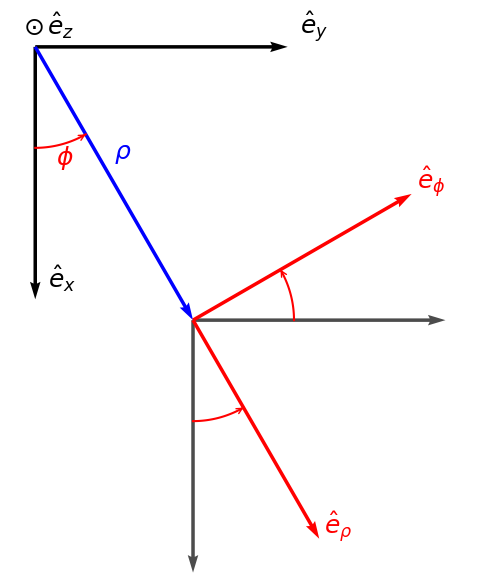

In [ ]:

# Projection matrix to screen coordinates:
# - ey (physical y) maps to → right
# - -ex (physical x) maps to ↓ down
to_xy = np.array([
    [0, 1, 0],   # screen x-axis = physical y (right)
    [-1, 0, 0]   # screen y-axis = -physical x (down)
])

# Apply projection onto xy: 
OH_xy = project(OM, to_xy) 
e_rho_xy  = project(e_rho, to_xy)
e_phi_xy  = project(e_phi, to_xy)
e_x_xy    = project(e_x, to_xy)
e_y_xy    = project(e_y, to_xy)

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')

# Fixed basis (black)
# ax.quiver(x0, y0, dx, dy, angles='xy', scale_units='xy', scale=1)
ax.quiver(0, 0, *e_x_xy, angles='xy', scale_units='xy', scale=1, color='black')
ax.text(*(e_x_xy  + 0.05), r'$\hat{e}_x$', color='black', fontsize=fontsize)

ax.quiver(0, 0, *e_y_xy, angles='xy', scale_units='xy', scale=1, color='black')
ax.text(*(e_y_xy + 0.05), r'$\hat{e}_y$', color='black', fontsize=fontsize)

# e_z is out of screen
ax.text(-0.05, 0.05, r'$\odot$', fontsize=fontsize, color='black')
ax.text(0.10, 0.15, r'$\hat{e}_z$', fontsize=fontsize, color='black',
        verticalalignment='top', horizontalalignment='center')

# Draw vector OH = rho
ax.quiver(0, 0, *OH_xy, angles='xy', scale_units='xy', scale=1, color='blue')
ax.text(0.5 * OH_xy[0], 0.5 * OH_xy[1]+.1, r'$\rho$', color='blue', fontsize=fontsize)

# draw angle: 
draw_angle_arc(ax, start_vec=e_x_xy, end_vec=e_rho_xy, label=r'$\phi$',color='red')

# Draw local basis at H (red)
H = OH_xy
# Dashed black vectors for ex and ey from point H
ax.quiver(*H, *e_x_xy, angles='xy', scale_units='xy', scale=1, color='black', ls=':',lw=1, alpha=0.7)
# draw angle: 
draw_angle_arc(ax, start_vec=e_x_xy, end_vec=e_rho_xy, label=None,color='red',origin=H)
draw_angle_arc(ax, start_vec=e_y_xy, end_vec=e_phi_xy, label=None,color='red',origin=H)


ax.quiver(*H, *e_y_xy, angles='xy', scale_units='xy', scale=1,color='black', ls=':',lw=1, alpha=0.7)
ax.quiver(*H, * e_rho_xy, angles='xy', scale_units='xy', scale=1, color='red')
ax.text(*(H + e_rho_xy + 0.02), r'$\hat{e}_\rho$', color='red', fontsize=fontsize)

ax.quiver(*H, *e_phi_xy, angles='xy', scale_units='xy', scale=1, color='red')
ax.text(*(H + e_phi_xy + 0.02), r'$\hat{e}_\phi$', color='red', fontsize=fontsize)

# Format plot
ax.set_xlim(-.1, 1.75)
ax.set_ylim(-2.10, .1)
ax.axis('off')
# ax.set_title(r'Projection onto the $(x, y)$ Plane using 3D $\to$ 2D transformation')

plt.tight_layout()
plt.show()
fig.savefig("spherical_proj_xy.png", dpi=300, bbox_inches='tight')


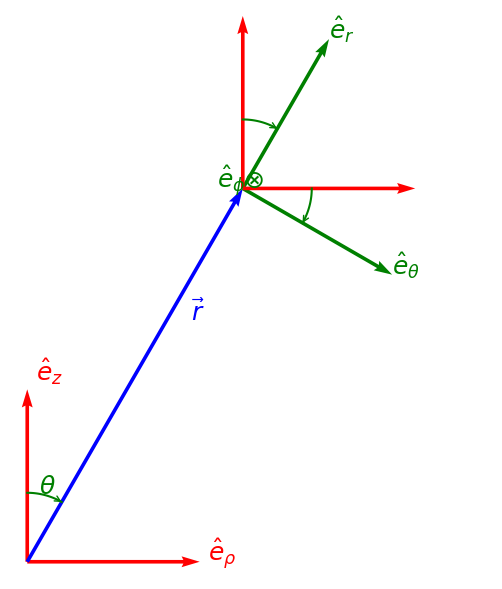

In [ ]:

# Projection matrix to (e_rho, e_z) plane
to_rhoz = np.array([
    [np.cos(phi_rad),  np.sin(phi_rad), 0],
    [0, 0, 1]
])


# Projected vectors
r_erho = project(OM, to_rhoz)
e_r_erho = project(e_r, to_rhoz)
e_theta_erho = project(e_theta, to_rhoz)

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')
ax.set_xlim(-0.1, 2.7)
ax.set_ylim(-0.1, 3.2)
ax.axis('off')

# Red basis vectors: e_rho, e_z
ax.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='red')
ax.text(1.05, 0.0, r'$\hat{e}_\rho$', color='red', fontsize=fontsize)
ax.quiver(0, 0, 0, 1, angles='xy', scale_units='xy', scale=1, color='red')
ax.text(0.05, 1.05, r'$\hat{e}_z$', color='red', fontsize=fontsize)

# Blue vector r
ax.quiver(0, 0, *r_erho, angles='xy', scale_units='xy', scale=1, color='blue')
ax.text(*(r_erho * 0.6)+np.array([0.2,0.1]), r'$\vec{r}$', color='blue', fontsize=fontsize)

# Clockwise arc for theta
draw_angle_arc(ax, start_vec=np.array([0, 1]), end_vec=r_erho,
               label=r'$\theta$', color='green')



# Green spherical basis vectors at tip of r
H = r_erho
ax.quiver(*H, *e_r_erho, angles='xy', scale_units='xy', scale=1, color='green')
ax.text(*(H + e_r_erho ), r'$\hat{e}_r$', color='green', fontsize=fontsize)

ax.quiver(*H, *e_theta_erho, angles='xy', scale_units='xy', scale=1, color='green')
ax.text(*(H + e_theta_erho ), r'$\hat{e}_\theta$', color='green', fontsize=fontsize)

# repeat the erho, ez basis vectors at the point M: 
ax.quiver(*H, 0, 1, angles='xy', scale_units='xy', scale=1, color='red')
# ax.text(1.05, 0.0, r'$\hat{e}_\rho$', color='red', fontsize=12)
# Clockwise arc for theta
draw_angle_arc(ax, start_vec=np.array([1, 0]), end_vec=e_theta_erho,
               label=r'', color='green',origin=H)
ax.quiver(*H, 1, 0, angles='xy', scale_units='xy', scale=1, color='red')
# ax.text(0.05, 1.05, r'$\hat{e}_z$', color='red', fontsize=12)
# Clockwise arc for theta
draw_angle_arc(ax, start_vec=np.array([0, 1]), end_vec=e_r_erho,
               label=r'', color='green',origin=H)



# e_phi into screen
ax.text(*(H + np.array([-0.0, 0.0])), r'$\otimes$', fontsize=fontsize, color='green')
ax.text(*(H + np.array([-0.15, 0.00])), r'$\hat{e}_\phi$', color='green', fontsize=fontsize)

plt.tight_layout( )
fig.savefig("spherical_proj_rhoz.png", dpi=300, bbox_inches='tight')
